In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk as erk
import matplotlib.pyplot as plt

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\csm116\OneDrive - Imperial College London\COURSERA-FINANCE\Introduction to Portfolio Construction\Week 2\edhec_risk.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("../data/ind30_m_vw_rets.csv",header=0, index_col=0,parse_dates=True)/100


In [2]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

def msr(riskfree_rate, er, cov):
    """
    Riskfree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n   # the cooma is to create a tuple of tuples n times
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights)-1 
    }
    def neg_sharpe_ratio(weights, riskfree_rate,er, cov):
        """
        Returns negative of sharpe ratio
        """
        r=erk.portfolio_return(weights,er)
        vol =erk.portfolio_vol(weights,cov)
        return -(r-riskfree_rate)/vol
        
    results = minimize(neg_sharpe_ratio, init_guess,
                      args = (riskfree_rate,er,cov,),method="SLSQP",
                       options={'disp':False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )    
    return results.x

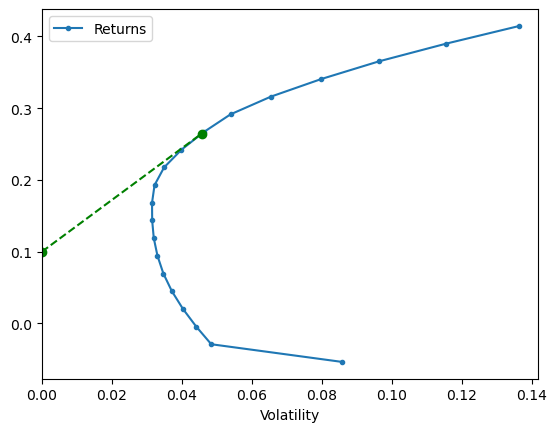

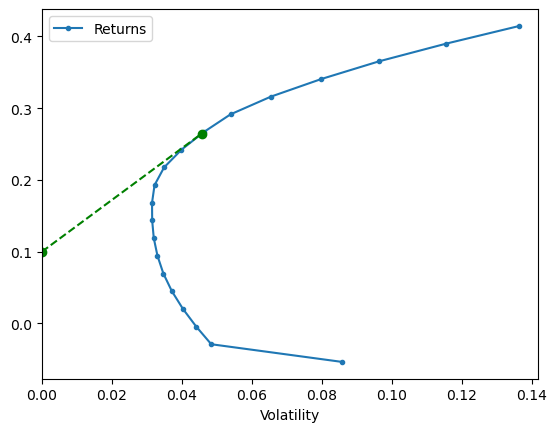

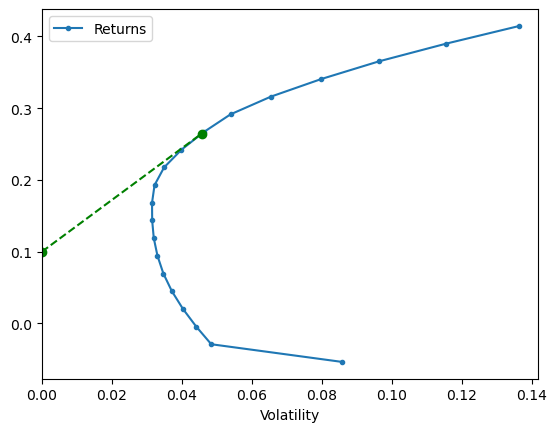

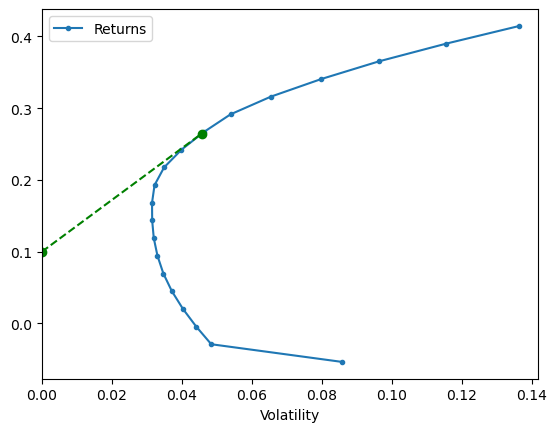

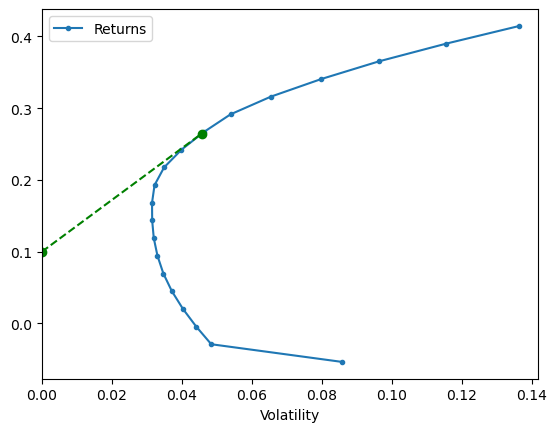

In [8]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = msr(rf,er,cov)
r_msr = erk.portfolio_return(w_msr,er)
vol_msr = erk.portfolio_vol(w_msr,cov)
# Add CML
cml_x = [0,vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x,cml_y,color="green",marker="o",linestyle="dashed")
plt.show()